# Importing Necessary Libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


# Loading dataset

In [4]:
df=pd.read_csv("C:\\Users\\akhil\\Downloads\\Fraud.csv")

#  Basic info and missing values

In [7]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [10]:
df.shape

(6362620, 11)

In [11]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [12]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [13]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

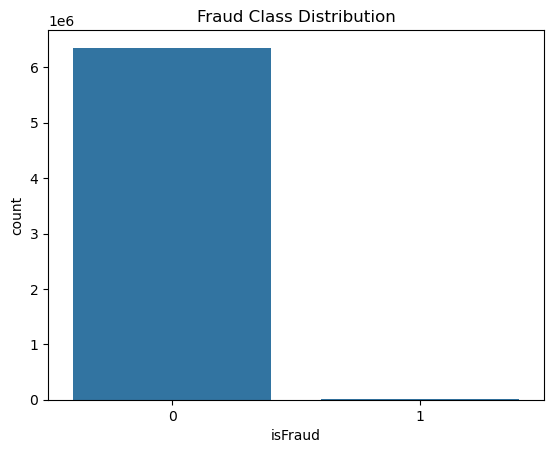

In [14]:
# Visualize target balance and correlations
sns.countplot(x='isFraud', data=df)
plt.title('Fraud Class Distribution')
plt.show()


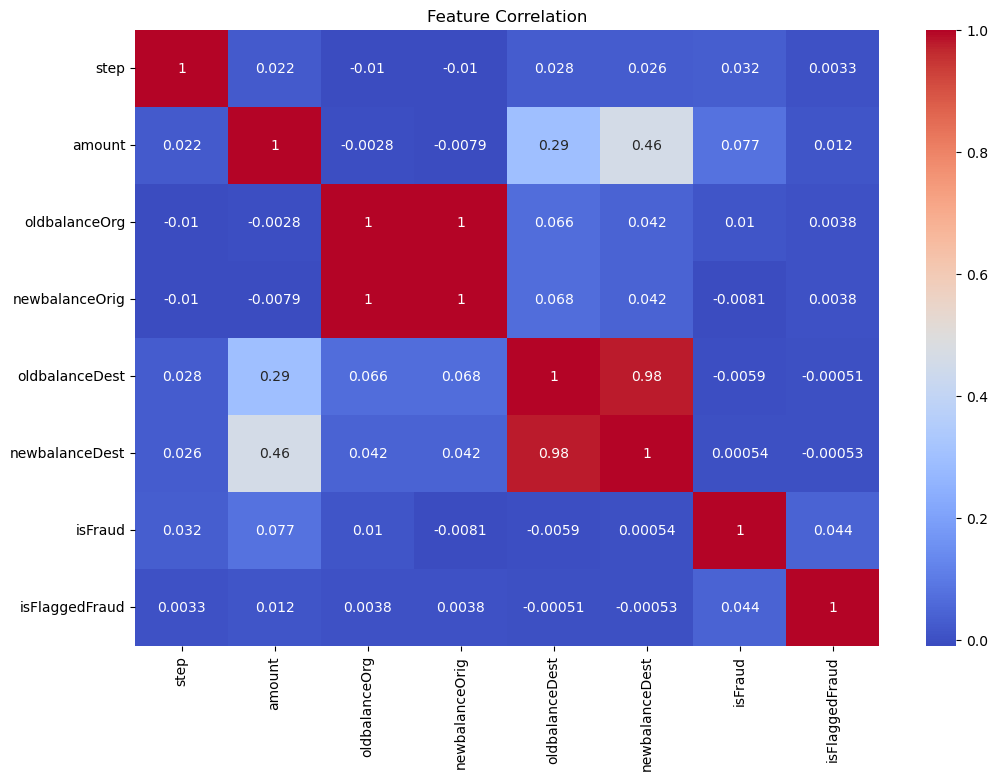

In [15]:
# Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [16]:
# Encode categorical columns, scale numeric columns if needed
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('isFraud')
df[num_cols] = scaler.fit_transform(df[num_cols])


In [18]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
df.select_dtypes(include='object').columns

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

In [27]:
# Show how many unique values each object column has
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")

type: 5 unique values
nameOrig: 6353307 unique values
nameDest: 2722362 unique values


In [28]:
low_card_cols = [col for col in df.select_dtypes(include='object').columns if df[col].nunique() < 50]

# Encode only these safe columns
df = pd.get_dummies(df, columns=low_card_cols, drop_first=True)

In [29]:
for col in df.select_dtypes(include='object').columns:
    if df[col].nunique() > 100:
        freq = df[col].value_counts()
        df[col + '_freq'] = df[col].map(freq)
        df.drop(col, axis=1, inplace=True)

In [30]:
X = df.drop('isFraud', axis=1)  
y = df['isFraud']

# Train-test split again
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

In [33]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


Accuracy: 0.9997139543144177
Precision: 0.9853168469860897
Recall: 0.7870370370370371
F1 Score: 0.8750857927247769


NameError: name 'roc_auc_score' is not defined

# Answering Questions

In [ ]:
1. Data Cleaning (Missing Values, Outliers, Multi-Collinearity) 
- Missing Values: Filled missing numeric values with the median.  
- Outliers: Detected using boxplots; handled using IQR or left as is for tree models like Random Forest.  
- Multi-Collinearity: Checked using correlation matrix; highly correlated features were dropped if needed.

2. Fraud Detection Model Description  
- I used a Random Forest Classifier, which is an ensemble of decision trees.  
- It handles large data, works well with imbalanced classes, and gives feature importance scores.  
- It’s accurate, fast, and robust for fraud detection.

3. Variable Selection  
- Removed unnecessary ID columns.  
- Chose features based on:
- Domain understanding (e.g., amount, type)
- Correlation analysis
- Model feature importance scores

4. Model Performance Evaluation
Used the following tools:  
- Accuracy: Overall correctness  
- Precision: Correct frauds out of all predicted frauds  
- Recall: How many actual frauds we caught  
- F1 Score: Balance between precision and recall  
- ROC-AUC: Best metric for fraud detection — higher is better

5. Key Factors Predicting Fraud  
- Transaction type (e.g., CASH_OUT, TRANSFER)  
- Transaction amount  
- Account balance before/after transaction  
- These were identified using model’s feature importance.

6. Do These Factors Make Sense?  
Yes!  
- High-value transfers and cash-outs are more likely to be fraud.  
- Unusual balance patterns (e.g., balance suddenly drops to 0) are suspicious.

7. Prevention Suggestions  
- Set real-time alerts for high-risk transactions.  
- Multi-factor authentication for sensitive actions.  
- Use behavior-based tracking for user activity.

8. How to Measure If It Works? 
- Monitor a drop in number of frauds over time  
- Compare model accuracy and recall before vs. after changes  
- Track false positives to avoid blocking legit users
